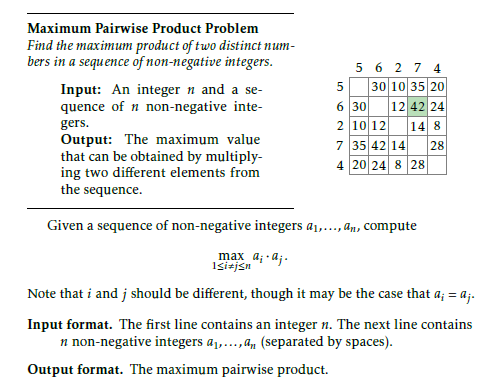

## 0. Theoretical approximate time

If the constrains are

Constrains. $ 2 ≤ n ≤ 10; 0≤ a_1, . . . ,a_n ≤ 10$

If the time by case test is 1.5$\mu s$ ( i.e. approx. 666 millions of cases tested by second).

**What is the time required to test all cases for this problem?**

Hint: Use the fact that $$ \sum_{i=0}^n r^i = 1 + r + r^2 + r^3 + \cdots + r^{n-1} + r^n   = \frac{r^{n+1} -1}{r-1} = \frac{1-r^{n+1}}{1-r} $$



In [1]:
Ncases = ((11**(10)-1)/(11-1))-(11+1)
Ncases

2593742448.0

# Experimental time all cases test

## 1. Write in Python a solution using lists, max and remove

In [3]:
def MaximumPairwiseProductMaxRemove(L):

  maximum = max(L)
  L.remove(maximum)
  second_maximum = max(L)

  return  maximum * second_maximum


## 2. Write in Python a solution that search for the max and second_max sequencialy

In [8]:
def MaximumPairwiseProductMaxSecondMax(L):
  maximum = 0
  second_maximum = 0

  for i in L:
    # Verify max
    if (i > maximum):
      second_maximum = maximum
      maximum = i
    # Verify SecMax
    elif (i > second_maximum):
      second_maximum = i

  return  maximum * second_maximum


In [ ]:
%time
L = [10,4]
result = MaximumPairwiseProductMaxRemove(n, L)
print(result)

In [ ]:
%time
L = [10,4,10,1]
result = MaximumPairwiseProductMaxRemove(n, L)
print(result)

In [ ]:
%time
L = [10,4,10,1,5,6,2,8,7,3]
result = MaximumPairwiseProductMaxRemove(n, L)
print(result)

## 3. Usng **itertools** produce all the all the test cases for the problem with  $ 2 ≤ n ≤ 8$, call the two solutions in each case and comapre the answers (census test) and report the time.

In [4]:
# Producing 100 cases per size, not able to bear all of them
from itertools import product
import random

testCases = []
numCases = 0
values = range(0,11)

# For each size in the constraints
for s in range(2, 11):

  # For each item in the permutation for the current size
  for i in range(100):

    # Getting a random permutation
    currItem = [random.choice(values) for item in range(s)]

    # Add item to the list of all cases and count the case
    testCases.append(currItem)
    numCases += 1

# Print results
print(numCases)
testCases



900


[[9, 3],
 [6, 8],
 [0, 7],
 [7, 4],
 [1, 4],
 [5, 0],
 [4, 1],
 [9, 6],
 [1, 0],
 [4, 9],
 [8, 6],
 [9, 9],
 [4, 5],
 [10, 9],
 [8, 0],
 [7, 3],
 [5, 5],
 [0, 8],
 [8, 4],
 [1, 10],
 [6, 9],
 [5, 9],
 [3, 9],
 [9, 10],
 [10, 1],
 [8, 10],
 [0, 4],
 [5, 6],
 [9, 10],
 [2, 0],
 [9, 8],
 [10, 1],
 [0, 6],
 [3, 7],
 [6, 2],
 [3, 8],
 [9, 2],
 [0, 3],
 [6, 0],
 [10, 0],
 [3, 0],
 [5, 0],
 [7, 1],
 [8, 0],
 [2, 7],
 [9, 7],
 [9, 5],
 [3, 3],
 [1, 4],
 [2, 0],
 [3, 2],
 [8, 5],
 [1, 0],
 [9, 1],
 [3, 8],
 [8, 0],
 [2, 8],
 [5, 5],
 [1, 9],
 [8, 8],
 [5, 10],
 [10, 0],
 [7, 4],
 [10, 7],
 [8, 4],
 [0, 7],
 [1, 5],
 [5, 0],
 [10, 1],
 [6, 3],
 [9, 7],
 [2, 9],
 [3, 8],
 [8, 4],
 [9, 5],
 [10, 5],
 [4, 4],
 [5, 7],
 [5, 7],
 [5, 5],
 [9, 3],
 [7, 10],
 [0, 8],
 [3, 5],
 [10, 5],
 [1, 7],
 [1, 7],
 [1, 9],
 [7, 6],
 [6, 6],
 [4, 0],
 [3, 7],
 [9, 3],
 [9, 1],
 [0, 5],
 [2, 1],
 [8, 9],
 [8, 4],
 [10, 6],
 [4, 8],
 [5, 5, 0],
 [4, 4, 1],
 [1, 0, 7],
 [8, 5, 5],
 [6, 4, 4],
 [1, 9, 4],
 [2, 10, 5],

In [9]:
import time

def timeCensus(test_cases):

  # For the total time in each case
  totalListsAlg = 0
  totalSequentiall = 0

  for i, test_case in enumerate(test_cases):

    # Measuring time for each one in its respective case
    # For lists alg
    startListsAlg = time.time()
    result_max_remove = MaximumPairwiseProductMaxRemove(test_case.copy())
    endListsAlg = time.time()

    # For sequentiall
    startSequentiall = time.time()
    result_max_second_max = MaximumPairwiseProductMaxSecondMax(test_case.copy())
    endSequentiall = time.time()

    # Measuring relative times for current case
    relTimLists = endListsAlg - startListsAlg
    relTimSeq = endSequentiall - startSequentiall

    # Adding total times
    totalListsAlg += relTimLists
    totalSequentiall += relTimSeq

    print(f"Test {i + 1}: {test_case}")
    if result_max_remove == result_max_second_max:
        print(f"Para {test_case} los resultados coinciden")
        print(f"La versión con listas tardo {relTimLists} segundos")
        print(f"La versión secuencial tardo {relTimSeq} segundos")
        print()
    else:
        print(f"Para {test_case} los resultados NO coinciden")
        print(f"Listas mostro {result_max_remove}")
        print(f"Secuencial mostro {result_max_second_max}")
        print()
        break

  print(f"En total:")
  print(f"Listas tardó {totalListsAlg} segundos")
  print(f"Secuencial tardó {totalSequentiall} segundos")

Time census test itertools:

In [10]:
%time
test_cases = [test_case.copy() for test_case in testCases]
timeCensus(test_cases)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs
Test 1: [9, 3]
Para [9, 3] los resultados coinciden
La versión con listas tardo 4.291534423828125e-06 segundos
La versión secuencial tardo 1.9550323486328125e-05 segundos

Test 2: [6, 8]
Para [6, 8] los resultados coinciden
La versión con listas tardo 5.245208740234375e-06 segundos
La versión secuencial tardo 2.6226043701171875e-06 segundos

Test 3: [0, 7]
Para [0, 7] los resultados coinciden
La versión con listas tardo 5.245208740234375e-06 segundos
La versión secuencial tardo 2.6226043701171875e-06 segundos

Test 4: [7, 4]
Para [7, 4] los resultados coinciden
La versión con listas tardo 5.4836273193359375e-06 segundos
La versión secuencial tardo 2.384185791015625e-06 segundos

Test 5: [1, 4]
Para [1, 4] los resultados coinciden
La versión con listas tardo 2.86102294921875e-06 segundos
La versión secuencial tardo 1.6689300537109375e-06 segundos

Test 6: [5, 0]
Para [5, 0] los resultados coinciden
La versión con listas tar

## 4. Use the modification in the following cell of the code from https://www.geeksforgeeks.org/print-all-permutations-with-repetition-of-characters/ to produce permutations with repetion to  produce all the all the test cases for the problem with $ 2 ≤ n ≤ 8$, call the two solutions in each case and comapre the answers (census test) and report the time.

In [11]:
# Recursive functions that traverses all posible combinations of array
def allLexicographicRecur (array, dataChanger, last, index, dataSaver):

    lengthArray = len(array)

    # One by one fix all characters at the given index and
    # recur for the subsequent indexes
    for j in range(lengthArray):
      # Fix the ith character at index and if this is not
      # the last index then recursively call for higher
      # indexes
      dataChanger[index] = array[j]

      # If this is the last index then print the string
      # stored in data[]
      if index==last:
          dataSaver.append(dataChanger.copy())
      else:
          allLexicographicRecur(array, dataChanger, last, index+1, dataSaver)

# Handler for the recursive function
def allLexicographic(array, length):

    # Create a temp array that will be used by
    # allLexicographicRecur()
    dataChanger = [0] * (length)
    dataSaver = []

    # Now print all permutations
    allLexicographicRecur(array, dataChanger, length-1, 0, dataSaver)

    return dataSaver

# Handler to use the permutator over a specific interval, length of the array
def lexicographicFromTill(array, init, end):

  result = []

  for i in range(init, end+1):
    currPart = allLexicographic(array, i)
    result.extend(currPart)

  return result

# Generating test cases, only till 3 length arr, not able till 10
lexArr = [x for x in range(0, 11)]
testCasesLex = lexicographicFromTill(lexArr, 2, 3)
testCasesLex

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [1, 10],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [3, 10],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 4],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [4, 10],
 [5, 0],
 [5, 1],
 [5, 2],
 [5, 3],
 [5, 4],
 [5, 5],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [5, 10],
 [6, 0],
 [6, 1],
 [6, 2],
 [6, 3],
 [6, 4],
 [6, 5],
 [6, 6],
 [6, 7],
 [6, 8],
 [6, 9],
 [6, 10],
 [7, 0],
 [7, 1],
 [7, 2],
 [7, 3],
 [7, 4],
 [7, 5],
 [7, 6],
 [7, 7],
 [7, 8],
 [7, 9],
 [7, 10],
 [8, 0],
 [8, 1],
 [8, 2],
 [8, 3],
 [8, 4],
 [8, 5],
 [8, 6],
 [8, 7],
 [8, 8],
 [8, 9],
 [8, 10],
 [9, 0],
 [9, 1],
 [9, 2],
 [9, 3],
 [9, 4],
 [9, 5],
 [9, 6],
 [9, 7],
 [9, 8],
 [9, 9],
 [9, 10],


Time census test geeksfrogeeks:

In [12]:
%time
test_cases = [test_case.copy() for test_case in testCasesLex]
timeCensus(test_cases)

Se han truncado las últimas 5000 líneas del flujo de salida.
La versión secuencial tardo 1.1920928955078125e-06 segundos

Test 454: [2, 8, 2]
Para [2, 8, 2] los resultados coinciden
La versión con listas tardo 1.9073486328125e-06 segundos
La versión secuencial tardo 7.152557373046875e-07 segundos

Test 455: [2, 8, 3]
Para [2, 8, 3] los resultados coinciden
La versión con listas tardo 1.6689300537109375e-06 segundos
La versión secuencial tardo 9.5367431640625e-07 segundos

Test 456: [2, 8, 4]
Para [2, 8, 4] los resultados coinciden
La versión con listas tardo 2.6226043701171875e-06 segundos
La versión secuencial tardo 1.1920928955078125e-06 segundos

Test 457: [2, 8, 5]
Para [2, 8, 5] los resultados coinciden
La versión con listas tardo 1.9073486328125e-06 segundos
La versión secuencial tardo 9.5367431640625e-07 segundos

Test 458: [2, 8, 6]
Para [2, 8, 6] los resultados coinciden
La versión con listas tardo 1.6689300537109375e-06 segundos
La versión secuencial tardo 9.5367431640625e-07

## 5. Write a unformly distributed random case generator  for $2 \le n \le 10 $ and $0  \le a_1,a_2, \cdots, a_n \le 10 $ and print time in which it finds $[0,1,2,3,4,5,6,7,8,9]$ or  $[1,2,3,4,5,6,7,8,9,10]$ and stop if it takes less than 5 mins and print -1 otherwise

Stoping time:

In [13]:
import random
import time

eset = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
obj = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
obj1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def generate_random_list():
    return random.sample(eset, k=10)

def find_matching_list():

  startTime = time.time()

  while True:
      urg = generate_random_list()

      if urg == obj or urg == obj1:
          print("Found:", urg)
          return urg

      current_time = time.time() - startTime
      if current_time > 300:  # 5 minutes
          print("Time limit exceeded. No match found.")
          return -1

# Example usage
start_time = time.time()
result = find_matching_list()
end_time = time.time()
Total_time = end_time - start_time
print("Result:", result)
print(f"\nTime: {Total_time} seconds")

Found: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Result: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Time: 12.931212902069092 seconds
